In [ ]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import cv2
import random
import keras.backend as K
import sklearn
%matplotlib inline

In [ ]:
# train_no = int(len(train_data)*0.9)
# training_data = train_data[:train_no]
# validation_data = train_data[train_no:]
# validation_data.to_csv('/content/drive/MyDrive/Broner/valid_csv.csv',index=False)
# training_data.to_csv('/content/drive/MyDrive/Broner/train_csv.csv',index=False)
# test_data.to_csv('/content/drive/MyDrive/Broner/test_csv.csv',index=False)

In [ ]:
# ROOT_DIR = '/content/drive/MyDrive/Broner'
# train_data = pd.read_csv('/content/drive/MyDrive/Broner/train_csv.csv')
# val_data   = pd.read_csv('/content/drive/MyDrive/Broner/valid_csv.csv')
# test_data  = pd.read_csv('/content/drive/MyDrive/Broner/test_csv.csv')
# train_data.head()

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/Broner'
train_data = pd.read_csv('/content/drive/MyDrive/Broner/MURA-v1.1/train_path_label.csv' , dtype=str)
test_data  = pd.read_csv('/content/drive/MyDrive/Broner/MURA-v1.1/valid_path_label.csv' , dtype=str)
train_data.head()

,0,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1


In [ ]:
print(len(train_data),len(test_data))

36808 3197


In [ ]:
train_shoulder = train_data[:8379]
train_humerus  = train_data[8379:9651]
train_forearm  = train_data[29440:31265]

test_shoulder = test_data[1708:2271]
test_forearm  = test_data[659:960]
test_humerus  = test_data[1420:1708]
# test_data  = test_data[1708:2271]
# train_data = train_data.sample(frac = 1)
# test_data  = test_data.sample(frac = 1)
# # train_data = train_data[:100]
# # val_data   = val_data[:20]
# # test_data  = test_data[:10]
# train_data.head(20)

In [ ]:
train_data = pd.concat([train_shoulder , train_forearm , train_humerus] , ignore_index=True)
train_data

,0,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
...,...,...
11471,MURA-v1.1/train/XR_HUMERUS/patient03224/study1...,0
11472,MURA-v1.1/train/XR_HUMERUS/patient03225/study1...,0
11473,MURA-v1.1/train/XR_HUMERUS/patient03225/study1...,0
11474,MURA-v1.1/train/XR_HUMERUS/patient03226/study1...,0


In [ ]:
test_data = pd.concat([test_shoulder , test_forearm , test_humerus] , ignore_index=True)
test_data

,0,label
0,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1
1,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1
2,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1
3,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,1
4,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,1
...,...,...
1147,MURA-v1.1/valid/XR_HUMERUS/patient11225/study1...,0
1148,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...,0
1149,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...,0
1150,MURA-v1.1/valid/XR_HUMERUS/patient11702/study1...,0


In [ ]:
train_data = train_data.sample(frac = 1)
test_data  = test_data.sample(frac = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(train_data['0'] , train_data['label'] , test_size = 0.2 , random_state=42 , stratify=train_data['label'])

In [ ]:
val_data = pd.DataFrame()
val_data['0']=x_val
val_data['label']=y_val
val_data.reset_index(inplace=True,drop=True)
val_data.head()

,0,label
0,MURA-v1.1/train/XR_SHOULDER/patient02266/study...,0
1,MURA-v1.1/train/XR_SHOULDER/patient02124/study...,0
2,MURA-v1.1/train/XR_SHOULDER/patient00688/study...,1
3,MURA-v1.1/train/XR_FOREARM/patient03532/study1...,0
4,MURA-v1.1/train/XR_HUMERUS/patient00077/study1...,0


In [ ]:
print(len(train_data) , len(test_data) , len(val_data))

11476 1152 2296


In [ ]:
# class data_generator():
#   def __init__(self):
#     self.labels=[]
#   def generator(self,samples,root_dir, batch_size,shuffle_data=True,resize=320):
#       """
#       Yields the next training batch.
#       Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
#       """
#       num_samples = len(samples)
#       count =0
#       while True: # Loop forever so the generator never terminates
#           samples = (samples)
#           count=0
#           offset = 0
#           # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
#           while offset<num_samples:
#               # Get the samples you'll use in this batch
#               batch_samples = samples[offset:offset+batch_size]
#               # Initialise X_train and y_train arrays for this batch
#               count+=1
#               if count>1:
#                 offset+=batch_size
#               print('--'+str(offset)+'--')
              
#               X_train = []
#               y_train = []

#               # For each example
#               for batch_sample in batch_samples:
#                   # Load image (X) and label (y)
#                   img_name = batch_sample[0]
#                   label = batch_sample[1]
#                   img =  cv2.imread(os.path.join(root_dir,img_name))
                  
#                   # apply any kind of preprocessing
#                   img = cv2.resize(img,(resize,resize))
#                   # Add example to arrays
#                   X_train.append(img)
#                   y_train.append(label)

#               # Make sure they're numpy arrays (as opposed to lists)
#               X_train = np.asarray(X_train).astype('float32')
#               mean = np.mean(X_train)
#               std = np.std(X_train)
#               X_train = (X_train - mean) / std
#               y_train = np.array(y_train)
#               self.labels.extend(y_train)
#               # The generator-y part: yield the next training batch            
#               yield X_train, y_train

In [ ]:
# gen = data_generator()
# train_datagen = gen.generator(train_data.values,ROOT_DIR,batch_size=20)
# x,y = next(train_datagen)
# x,y = next(train_datagen)
# # x,y = next(train_datagen)
# # x,y = next(train_datagen)
# # x,y = next(train_datagen)
# # x,y = next(train_datagen)
# print ('x_shape: ', x.shape)
# print ('labels: ', y)
# print(len(gen.labels))

==0==
==0==
x_shape:  (20, 320, 320, 3)
labels:  [0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0]
40


In [ ]:
test_data['0']

1854    MURA-v1.1/valid/XR_SHOULDER/patient11300/study...
1954    MURA-v1.1/valid/XR_SHOULDER/patient11292/study...
1979    MURA-v1.1/valid/XR_SHOULDER/patient11188/study...
2054    MURA-v1.1/valid/XR_SHOULDER/patient11662/study...
2230    MURA-v1.1/valid/XR_SHOULDER/patient11399/study...
                              ...                        
1940    MURA-v1.1/valid/XR_SHOULDER/patient11290/study...
1759    MURA-v1.1/valid/XR_SHOULDER/patient11707/study...
2008    MURA-v1.1/valid/XR_SHOULDER/patient11746/study...
1804    MURA-v1.1/valid/XR_SHOULDER/patient11380/study...
1895    MURA-v1.1/valid/XR_SHOULDER/patient11727/study...
Name: 0, Length: 563, dtype: object

In [ ]:
def preproc(image):
  image = image/255.
  image[:,:,0] = (image[:,:,0]-0.485)/0.229
  image[:,:,1] = (image[:,:,1]-0.456)/0.224
  image[:,:,2] = (image[:,:,2]-0.406)/0.225
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


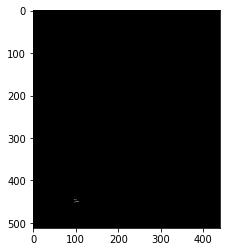

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Broner/MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png')
plt.imshow(image)
image = preproc(image)
plt.imshow(image,cmap='gray')

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = preproc,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range = 0.15,
    validation_split = 0.1)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = preproc)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_data,
directory=ROOT_DIR, 
x_col="0",
y_col="label",
subset="training",
batch_size=256,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(320,320))
 
valid_generator=train_datagen.flow_from_dataframe(
dataframe=train_data,
directory=ROOT_DIR,
x_col="0",
y_col="label",
subset="validation",
batch_size=256,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(320,320))
 
 
# test_generator=test_datagen.flow_from_dataframe(
# dataframe=test_data,
# directory=ROOT_DIR,
# x_col="0",
# y_col='label',
# batch_size=128,
# seed=42,
# shuffle=False,
# class_mode="binary",
# target_size=(320,320))

Found 10329 validated image filenames belonging to 2 classes.
Found 1147 validated image filenames belonging to 2 classes.


In [ ]:
# def preprocessing(img,label):
#     mean = np.mean(Images)
#     std = np.std(Images)
#     Images = (Images - mean) / std
#   return Images
#     return img,label

In [ ]:
# import os
# import numpy as np
# import cv2
# import random
# import keras.backend as K


# def load_image(root , images_path, size = 320):
#   Images = []
#   for path in images_path:
#     try:
#       p = os.path.join(root,path)
#       image = cv2.imread(p)
#       image = cv2.resize(image,(size,size))
#       Images.append(image)

#     except Exception as e:
#       print(str(e))

#   Images = np.asarray(Images).astype('float32')

#   mean = np.mean(Images)
#   std = np.std(Images)
#   Images = (Images - mean) / std
#   return Images


In [ ]:
# train_images = load_image('/content/drive/MyDrive/Broner' , train_path , 320)
# val_images   = load_image('/content/drive/MyDrive/Broner' , validation_path , 320)

In [ ]:
# plt.figure(figsize=(5,5))
# plt.imshow(train_images[0])
# plt.imshow(val_images[0])

In [ ]:
# x_train , y_train = train_images , train_data.iloc[:20 , 1]
# train_datagen = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)
# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# train_datagen.fit(x_train)
# # fits the model on batches with real-time data augmentation:

# x_val , y_val = val_images , train_data.iloc[20:25 , 1]
# val_datagen = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     )
# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# train_datagen.fit(x_train)
# # fits the model on batches with real-time data augmentation:
# val_datagen.fit(x_val)


Custom CallBack for saving 5 best models based on validation accuracy

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        #self.models = []
        self.best_epochs = []
        self.min_auc = np.inf
        self.best_auc=[]
        self.root = '/content/drive/MyDrive/Broner/InceptionResnet'
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))


    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        if len(self.best_epochs)<5:
          # self.models.append(self.model.get_weights())
          self.best_epochs.append(epoch)
          self.best_auc.append(logs['val_accuracy'])
          id = len(self.best_auc)-1
          self.min_auc = min(self.min_auc , logs['val_accuracy'])
          filepath = os.path.join(self.root , str(id)+'.hdf5')
          self.model.save(filepath , overwrite=True)
        else:
          if logs['val_accuracy']>self.min_auc:
            idx = self.best_auc.index(self.min_auc)
            self.best_auc[idx] = logs['val_accuracy']
            self.best_epochs[idx]=epoch
            self.min_auc = min(self.best_auc)
            filepath = os.path.join(self.root , str(idx)+'.hdf5')
            self.model.save(filepath , overwrite=True)
            # self.models[idx] = self.model.get_weights()

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
def make_model(output_bias = None, metrics = None):    
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    base_model = keras.applications.InceptionResNetV2(input_shape=(*[320,320], 3),
                                                include_top=False,
                                                weights='imagenet')
    
    base_model.trainable = False
    
    model = tf.keras.Sequential([
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(512),
        BatchNormalization(),
        keras.layers.Activation('relu'),
        Dropout(0.5),
        keras.layers.Dense(256),
        BatchNormalization(),
        keras.layers.Activation('relu'),
        Dropout(0.4),
        keras.layers.Dense(128),
        BatchNormalization(),
        keras.layers.Activation('relu'),
        Dropout(0.3),
        keras.layers.Dense(64),
        BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dense(1, activation='sigmoid',
                              bias_initializer=output_bias)
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=metrics)
    
    return model

In [ ]:
total_img = train_data['label'].size
positive = len(train_data[train_data['label']=='1'])
negative = total_img - positive
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_img, positive, 100 * positive / total_img))

initial_bias = np.log([positive/negative])
initial_bias

Examples:
    Total: 11476
    Positive: 5428 (47.30% of total)



array([-0.1081569])

In [ ]:
# BATCH_SIZE = 20
# STEPS_PER_EPOCH = len(train_data) // BATCH_SIZE
# VALID_STEPS = len(val_data) // BATCH_SIZE

In [ ]:
def exponential_decay(lr0):
    def exponential_decay_fn(epoch):
      if epoch>5 and epoch%3==0:
        return lr0 * tf.math.exp(-0.1)
      else:
        return lr0
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Broner/bone.h5",
#                                                     save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,
                                                     restore_best_weights=True)

In [ ]:
model = make_model(output_bias = initial_bias, metrics=[tf.keras.metrics.AUC(name='auc'),'accuracy'])
model.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
batch_normalization_203 (Bat (None, 512)               2048      
_________________________________________________________________
activation_203 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_______________________________________________________

In [ ]:
# history = model.fit(train_datagen.flow(x_train, y_train,batch_size=2) ,
#                                 steps_per_epoch=STEPS_PER_EPOCH,
#                                 validation_data = val_datagen.flow(x_val , y_val , batch_size = 2),
#                                 validation_steps=VALID_STEPS,
#                                 callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
#                                 epochs = 10)

In [ ]:
# traingen             = data_generator()
# train_generator      = traingen.generator(train_data.values,ROOT_DIR, batch_size=20)
# valgen               = data_generator()
# validation_generator = valgen.generator(val_data.values,ROOT_DIR,shuffle_data= False, batch_size=5)
# testgen              = data_generator()
# test_generator       = testgen.generator(test_data.values,ROOT_DIR, shuffle_data=False, batch_size=5)

In [ ]:
# custom = CustomCallback()
# history = model.fit_generator(train_generator ,
#                     steps_per_epoch=STEPS_PER_EPOCH,
#                     validation_data = validation_generator,
#                     validation_steps=VALID_STEPS,
#                     callbacks=[early_stopping_cb, lr_scheduler , custom],
#                     epochs = 10)
custom = CustomCallback()
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[early_stopping_cb, lr_scheduler , custom],
                    epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Starting training; got log keys: []
Epoch 1/20
40/40 [==============================] - 2641s 66s/step - loss: 0.7292 - auc: 0.5916 - accuracy: 0.5735 - val_loss: 1.3296 - val_auc: 0.6914 - val_accuracy: 0.6270
End epoch 0 of training; got log keys: ['loss', 'auc', 'accuracy', 'val_loss', 'val_auc', 'val_accuracy', 'lr']
Epoch 2/20
40/40 [==============================] - 309s 8s/step - loss: 0.6088 - auc: 0.7277 - accuracy: 0.6736 - val_loss: 0.8228 - val_auc: 0.7406 - val_accuracy: 0.6436
End epoch 1 of training; got log keys: ['loss', 'auc', 'accuracy', 'val_loss', 'val_auc', 'val_accuracy', 'lr']
Epoch 3/20
40/40 [==============================] - 312s 8s/step - loss: 0.5648 - auc: 0.7779 - accuracy: 0.7148 - val_loss: 0.5652 - val_auc: 0.7907 - val_accuracy: 0.7070
End epoch 2 of training; got log keys: ['loss', 'auc', 'accuracy', 'val_loss', 'val_auc', 'val_accuracy', 'lr']
Epoch 4/20
40/40 [==============================] - 313s 8s/step - loss: 0.5646 - auc: 0.7784 - accuracy: 0

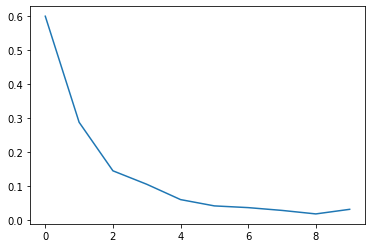

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
print(custom.best_epochs)
print(custom.best_auc)

[14, 19, 16, 17, 9]
[0.7626953125, 0.751953125, 0.7705078125, 0.7490234375, 0.7470703125]


In [ ]:
# valid_generator2=test_datagen.flow_from_dataframe(
# dataframe=val_data,
# directory=ROOT_DIR,
# x_col="0",
# y_col="label",
# batch_size=256,
# seed=42,
# shuffle=False,
# class_mode="binary",
# target_size=(320,320))

In [ ]:
val_generator=test_datagen.flow_from_dataframe(
dataframe=val_data,
directory=ROOT_DIR,
x_col="0",
y_col='label',
batch_size=574,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(320,320))

STEP_SIZE_VAL=val_generator.n//val_generator.batch_size

df_train = pd.DataFrame()
dir = '/content/drive/MyDrive/Broner/InceptionResnet'
for f in os.listdir(dir):
    # make prediction
    filepath = os.path.join(dir, f)
    print(filepath)
    if filepath.endswith('hdf5'):
      model= keras.models.load_model(filepath)
      yhat = model.predict_generator(val_generator,STEP_SIZE_VAL) 
      yhat = yhat>=0.5
      yhat = np.uint8(yhat)
      yhat = yhat.reshape(-1)
      df_train[f] = yhat

val_y = val_data['label']
df_train['y_tru'] = np.array(val_y)
df_train.head()

Found 2296 validated image filenames belonging to 2 classes.
/content/drive/MyDrive/Broner/InceptionResnet/Ml
/content/drive/MyDrive/Broner/InceptionResnet/4.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


/content/drive/MyDrive/Broner/InceptionResnet/3.hdf5
/content/drive/MyDrive/Broner/InceptionResnet/0.hdf5
/content/drive/MyDrive/Broner/InceptionResnet/1.hdf5
/content/drive/MyDrive/Broner/InceptionResnet/2.hdf5


,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,0


In [ ]:
test_generator2=test_datagen.flow_from_dataframe(
dataframe=test_data,
directory=ROOT_DIR,
x_col="0",
y_col='label',
batch_size=288,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(320,320))

STEP_SIZE_TEST=test_generator2.n//test_generator2.batch_size

df_test= pd.DataFrame()
dir = '/content/drive/MyDrive/Broner/InceptionResnet'
for f in os.listdir(dir):
    # make prediction
    filepath = os.path.join(dir, f)
    print(filepath)
    if filepath.endswith('hdf5'):
      model= keras.models.load_model(filepath)
      yhat = model.predict_generator(test_generator2,STEP_SIZE_TEST) 
      yhat = yhat>=0.5
      yhat = np.uint8(yhat)
      yhat = yhat.reshape(-1)
      df_test[f] = yhat

test_y = test_data2['label']
df_test['y_tru'] = np.array(test_y)
df_test.head()

In [ ]:
test_y = test_data['label']
df_test['y_tru'] = np.array(test_y)
df_test

,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
1147,0,0,0,0,0,1
1148,0,1,0,0,0,0
1149,0,0,0,1,0,1
1150,1,1,1,1,1,0


In [ ]:
df_train.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv' , index=False)
df_test.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv' , index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , train_test_split
train_x = df_train.drop(['y_tru'] , axis=1)
train_y = df_train['y_tru']
test_x = df_test.drop(['y_tru'] , axis=1)
test_y = df_test['y_tru']
logreg = LogisticRegression()
logreg.fit(train_x , train_y)
cv_score = cross_val_score(logreg ,test_x,test_y , cv =5 )
print(cv_score)
print(np.mean(cv_score))

[0.76190476 0.78354978 0.79130435 0.81304348 0.75652174]
0.7812648221343873


In [ ]:
df_test.head()

,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru
0,0,1,0,0,0,0
1,0,1,1,1,1,1
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,1,1,0,1,1,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l1',solver='liblinear')
train_x = df_train.drop(['y_tru'] , axis=1)
train_y = df_train['y_tru']
test_x = df_test.drop(['y_tru'] , axis=1)
test_y = df_test['y_tru']
# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(train_x, train_y)
df_test['predicted']=searcher.predict(test_x)
# Report the best parameters
print("Best CV params", searcher.best_params_)
df_train.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv' , index=False)
df_test.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv' , index=False)
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))
print(best_lr.score(test_x,test_y))

Best CV params {'C': 0.01}
Total number of features: 5
Number of selected features: 4
0.7786458333333334


In [ ]:
df_test.head()

,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru,predicted
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
df_train = pd.read_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv')
train_x = df_train.drop(['y_tru'] , axis=1)
train_y = df_train['y_tru']
test_x = df_test.drop(['y_tru','predicted'] , axis=1)
test_y = df_test['y_tru']
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(train_x,train_y)
df_test['predicted']=searcher.predict(test_x)
df_train.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv' , index=False)
df_test.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv' , index=False)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(test_x , test_y))

Best CV params {'C': 10, 'gamma': 0.1}
Best CV accuracy 0.7809216633513307
Test accuracy of best grid search hypers: 0.7795138888888888


In [ ]:
df_test.head()

,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru,predicted
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
linear_classifier = SGDClassifier(random_state=0)
df_train = pd.read_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv')
train_x = df_train.drop(['y_tru'] , axis=1)
train_y = df_train['y_tru']
test_x = df_test.drop(['y_tru','predicted'] , axis=1)
test_y = df_test['y_tru']
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1' , 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(train_x,train_y)
df_test['predicted']=searcher.predict(test_x)
df_train.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/train_ensemble.csv' , index=False)
df_test.to_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv' , index=False)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(test_x, test_y))

Best CV params {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.7800303778241884
Test accuracy of best grid search hypers: 0.7829861111111112


In [ ]:
df_test

,4.hdf5,3.hdf5,0.hdf5,1.hdf5,2.hdf5,y_tru,predicted
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1147,0,0,0,0,0,1,0
1148,0,1,0,0,0,0,0
1149,0,0,0,1,0,1,0
1150,1,1,1,1,1,0,1


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Broner/InceptionResnet/Ml/finalized_model.sav'
pickle.dump(searcher, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [ ]:
from sklearn.metrics import  roc_auc_score , mean_squared_error
df_test = pd.read_csv('/content/drive/MyDrive/Broner/InceptionResnet/Ml/test_ensemble.csv')
df_test

,4.hdf5,0.hdf5,1.hdf5,2.hdf5,3.hdf5,y_tru,predicted
0,1,1,1,1,1,1,1
1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
556,1,1,1,1,1,1,1
557,1,1,1,1,1,1,1
558,1,1,1,1,1,0,1
559,1,1,1,1,1,1,1


In [ ]:
print(roc_auc_score(df_test['y_tru'] , df_test['predicted']))

0.7287906137184116


In [ ]:
import pickle
filename = '/content/drive/MyDrive/Broner/InceptionResnet/Ml/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
x_test = df_test.drop(['y_tru' , 'predicted'],axis=1).values
y_test = df_test['y_tru'].values  
plt.show()

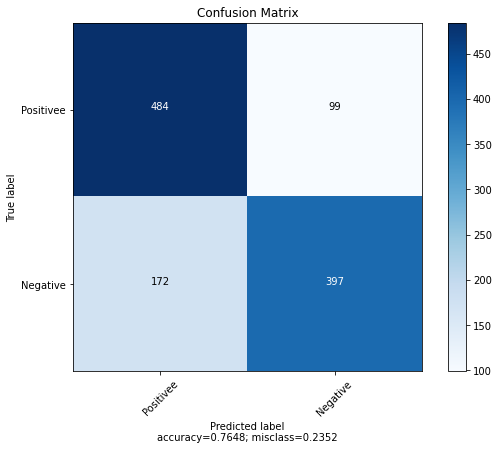

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm           = confusion_matrix(df_test['y_tru'],df_test['predicted']),
                      normalize    = False,
                      target_names = ['Positivee' , 'Negative'],
                      title        = "Confusion Matrix")

In [ ]:
# #model = make_model(output_bias = initial_bias, metrics=tf.keras.metrics.AUC(name='auc'))
# print(len(model.layers))
# print(m)
# # for i in range(len(m) , 0 , -1):
# #     model.layers[i].set_weights(weights)

In [ ]:
# import os
# import numpy as np
# import cv2
# import random
# import keras.backend as K

# def load_image(root , images_path, size = 320):
#   Images = []
#   for path in images_path:
#     try:
#       p = os.path.join(root,path)
#       image = cv2.imread(p)
#       image = cv2.resize(image,(size,size))
#       Images.append(image)

#     except Exception as e:
#       print(str(e))

#   Images = np.asarray(Images).astype('float32')

#   mean = np.mean(Images)
#   std = np.std(Images)
#   Images = (Images - mean) / std
#   return Images

In [ ]:
# test_x , test_y = load_image(ROOT_DIR , test_data.iloc[:5,0] , 320) , test_data.iloc[:5,1]
# test_data= test_data[:10]
# test_generator = generator(test_data.values,ROOT_DIR, shuffle_data=False, batch_size=5)

In [ ]:
model       = keras.models.load_model('/content/drive/MyDrive/Broner/InceptionResnet/0.hdf5')
y_pred      = model.predict_generator(test_generator ,2)
y_pred      = y_pred>=0.5
y_pred      = np.uint8(y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# # stacked generalization with linear meta model on blobs dataset
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from keras.utils import to_categorical
# from numpy import dstack


# # create stacked model input dataset as outputs from the ensemble
# def stacked_dataset(dir, gen, generator  ,batch_size , size):
#   stackX = None
#   tru_lab = None
#   for f in os.listdir(dir):
#     # make prediction
#     filepath = os.path.join(dir, f)
#     print(filepath)
#     model= keras.models.load_model(filepath)
#     yhat = model.predict_generator(generator, int(size/batch_size))
#     tru_lab = gen.labels
#     print(len(gen.labels))
#     tru_lab = tru_lab[batch_size:]
#     gen.labels=[]
#     yhat = yhat>=0.5
#     yhat = np.uint8(yhat)
#     # stack predictions into [rows, members, probabilities]
#     if stackX is None:
#       stackX = yhat
#     else:
#       stackX = dstack((stackX, yhat))
#   # flatten predictions to [rows, members x probabilities]
#   stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))

#   return stackX , tru_lab

# # fit a model based on the outputs from the ensemble members
# def fit_stacked_model(dir, gen , generator , batch_size , size):
#   # create dataset using ensemble
#   stackedX , inputy= stacked_dataset(dir ,gen, generator , batch_size , size)
#   # fit standalone model
#   print(len(stackedX))
#   print(len(inputy))
#   model = LogisticRegression()
#   model.fit(stackedX, inputy)
#   return model

# # make a prediction with the stacked model
# def stacked_prediction(dir, model, gen ,generator , batch_size , size):
# 	# create dataset using ensemble
# 	stackedX, y_tru = stacked_dataset(dir, gen ,generator , batch_size, size)
# 	# make a prediction
# 	yhat = model.predict(stackedX)
# 	return yhat , y_tru

# # generate 2d classification dataset
# # X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# # # split into train and test
# # n_train = 100
# # trainX, testX = X[:n_train, :], X[n_train:, :]
# # trainy, testy = y[:n_train], y[n_train:]
# # print(trainX.shape, testX.shape)
# # # load all models
# # n_members = 5
# # members = load_all_models(n_members)
# # print('Loaded %d models' % len(members))
# # # evaluate standalone models on test dataset
# # for model in members:
# # 	testy_enc = to_categorical(testy)
# # 	_, acc = model.evaluate(testX, testy_enc, verbose=0)
# # 	print('Model Accuracy: %.3f' % acc)
# # # fit stacked model using the ensemble

# ushufgen    = data_generator()
# unshuftrain = ushufgen.generator(train_data.values,ROOT_DIR,shuffle_data=False, batch_size=20)

# ushuftestgen= data_generator()
# unshuftest  = ushuftestgen.generator(test_data.values,ROOT_DIR,shuffle_data=False, batch_size=5)

# model = fit_stacked_model('/content/drive/MyDrive/Broner/InceptionResnet', ushufgen, unshuftrain , 20 , 100)
# # evaluate model on test set
# yhat , y_tru = stacked_prediction('/content/drive/MyDrive/Broner/InceptionResnet', model,ushuftestgen, unshuftest , 5, 10)
# acc = accuracy_score(y_tru, yhat)
# print('Stacked Test Accuracy: %.3f' % acc)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix , confusion_matrix
# import seaborn as sn
# cm=confusion_matrix(test_y,y_pred)
# df_cm = pd.DataFrame(cm)
# print(df_cm)
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True)